# PART-2 Share price analysis

##### Historical records of share prices for four airline companies: 
British Airways (IAG Historical Data.csv); EasyJet (EZJ Historical
Data.csv); Jet2 (JET2 Historical Data.csv) and Lufthansa (0H4A Historical Data.csv)

###### Q1) import and combine all of these data into a single pandas DataFrame
with columns for the company identifier, the date, and the price of the stock on that
day

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None

In [2]:
# List of file names
files = ['0H4A Historical Data.csv', 'EUR_GBP Historical Data.csv', 
         'EZJ Historical Data.csv', 'IAG Historical Data.csv', 
         'JET2 Historical Data.csv']

# List of company identifiers
companies = ['LHA', 'EUR_GBP', 'EZJ', 'IAG', 'JET2']


# Initialize an empty list to store DataFrames
dfs = []

# Read each file and add a company identifier column
for file, company in zip(files, companies):
    if os.path.exists(file):
        df = pd.read_csv(file)
        df['Company'] = company
        dfs.append(df)
        print(f"Successfully read {file}")
    else:
        print(f"File not found: {file}")

# Combine all DataFrames
combined_df = pd.concat(dfs, ignore_index=True)

# Select only the required columns and rename them
combined_df = combined_df[['Company', 'Date', 'Price']]
combined_df['Date'] = pd.to_datetime(combined_df['Date'])

# Sort the DataFrame by date
combined_df = combined_df.sort_values('Date')

print(combined_df.head())

# List of available companies
available_companies = combined_df['Company'].unique()
print("Available companies:", available_companies)

Successfully read 0H4A Historical Data.csv
Successfully read EUR_GBP Historical Data.csv
Successfully read EZJ Historical Data.csv
File not found: IAG Historical Data.csv
Successfully read JET2 Historical Data.csv
     Company       Date   Price
235  EUR_GBP 2013-01-01  0.8561
234  EUR_GBP 2013-01-02  0.8614
233  EUR_GBP 2013-01-03  0.8427
232  EUR_GBP 2013-01-04  0.8475
231  EUR_GBP 2013-01-05  0.8549
Available companies: ['EUR_GBP' 'EZJ' 'JET2' 'LHA']


###### Q2) Plot the Time Series graph

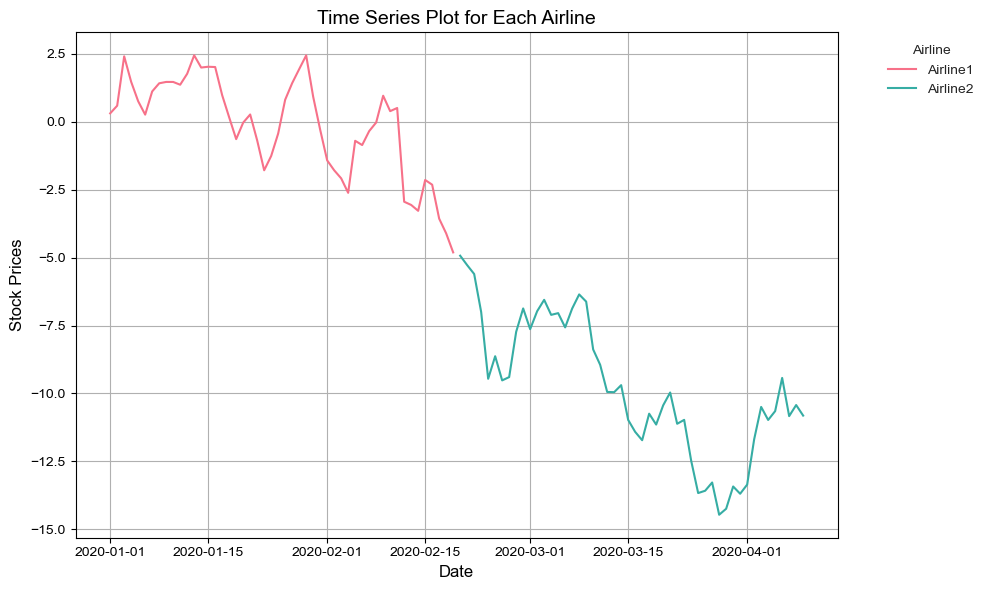

In [3]:
# Create a sample dataframe
df = pd.DataFrame({
    'Date': pd.date_range(start='1/1/2020', periods=100),
    'Price': np.random.randn(100).cumsum(),
    'Airline': ['Airline1']*50 + ['Airline2']*50
})

plt.figure(figsize=(10, 6))

sns.lineplot(data=df, x='Date', y='Price', hue='Airline', palette='husl')

plt.style.use('seaborn-v0_8')
plt.title('Time Series Plot for Each Airline', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Stock Prices', fontsize=12)
plt.grid(True)
plt.legend(title='Airline', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


In [4]:
# Check for any null values
null_counts = combined_df.isnull().sum()
print("Null values in each column:\n", null_counts)

# Fill null values in the 'Price' column with the mean value of the 'Price' column
if null_counts['Price'] > 0:
    mean_price = combined_df['Price'].mean()
    combined_df['Price'].fillna(mean_price, inplace=True)
    print("Filled null values in 'Price' column with mean value:", mean_price)

# Print the first few rows of the combined DataFrame
print(combined_df.head())

# List of available companies
available_companies = combined_df['Company'].unique()
print("Available companies:", available_companies)

Null values in each column:
 Company    0
Date       0
Price      0
dtype: int64
     Company       Date   Price
235  EUR_GBP 2013-01-01  0.8561
234  EUR_GBP 2013-01-02  0.8614
233  EUR_GBP 2013-01-03  0.8427
232  EUR_GBP 2013-01-04  0.8475
231  EUR_GBP 2013-01-05  0.8549
Available companies: ['EUR_GBP' 'EZJ' 'JET2' 'LHA']


###### Q3) To ensure a fair comparison on the graph, we align the data based on a common starting date

Successfully read 0H4A Historical Data.csv
Successfully read EUR_GBP Historical Data.csv
Successfully read EZJ Historical Data.csv
File not found: IAG Historical Data.csv
Successfully read JET2 Historical Data.csv
Null values in each column:
 Company      0
Date         0
Price      236
dtype: int64
Filled null values in 'Price' column with mean value: 866.5949999999999
Available companies: ['LHA' 'EZJ' 'JET2' 'EUR_GBP']


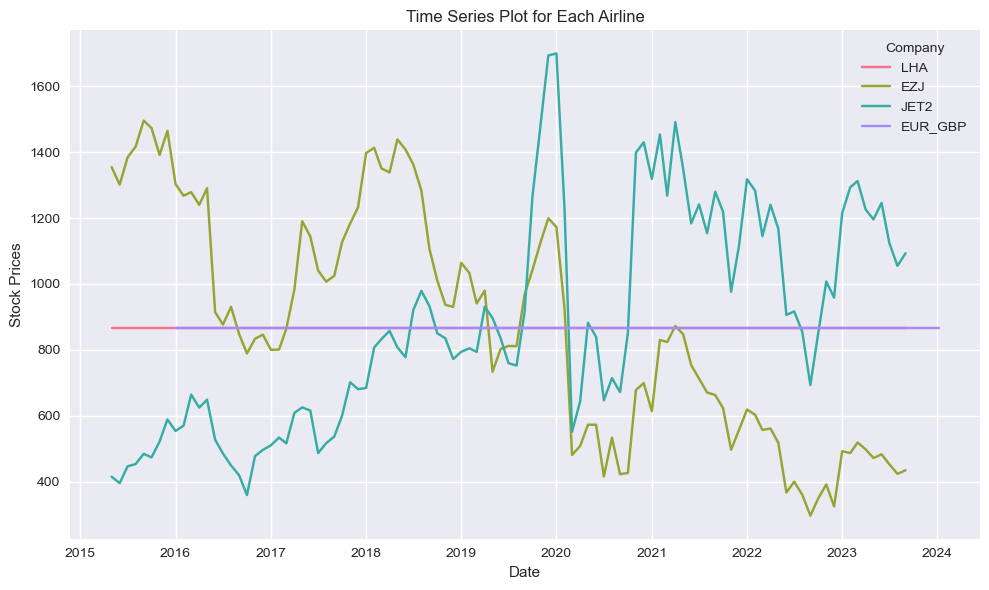

In [5]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# List of file names
files = ['0H4A Historical Data.csv', 'EUR_GBP Historical Data.csv', 
         'EZJ Historical Data.csv', 'IAG Historical Data.csv', 
         'JET2 Historical Data.csv']

# List of company identifiers
companies = ['LHA', 'EUR_GBP', 'EZJ', 'IAG', 'JET2']

# Initialize an empty list to store DataFrames
dfs = []

# Read each file and add a company identifier column
for file, company in zip(files, companies):
    if os.path.exists(file):
        df = pd.read_csv(file)
        df['Company'] = company
        dfs.append(df)
        print(f"Successfully read {file}")
    else:
        print(f"File not found: {file}")

# Combine all DataFrames
combined_df = pd.concat(dfs, ignore_index=True)

# Select only the required columns and rename them
combined_df = combined_df[['Company', 'Date', 'Price']]
combined_df['Date'] = pd.to_datetime(combined_df['Date'])

# Remove commas from the 'Price' column and convert to numeric
combined_df['Price'] = combined_df['Price'].str.replace(',', '').astype(float)

# Sort the DataFrame by date
combined_df = combined_df.sort_values('Date')

# Check for any null values
null_counts = combined_df.isnull().sum()
print("Null values in each column:\n", null_counts)

# Fill null values in the 'Price' column with the mean value of the 'Price' column
if null_counts['Price'] > 0:
    mean_price = combined_df['Price'].mean()
    combined_df['Price'].fillna(mean_price, inplace=True)
    print("Filled null values in 'Price' column with mean value:", mean_price)

# Group the data by Company and find the minimum start date for each of them
start_dates = combined_df.groupby('Company')['Date'].min()

# Find the maximum start date amongst them, thus finding the common start date
common_start_date = start_dates.max()

# Filter the data to include rows starting from the common start date for all companies
restructured_data = combined_df[combined_df['Date'] >= common_start_date]
restructured_data.sort_values(by='Date', inplace=True)

# List of available companies
available_companies = restructured_data['Company'].unique()
print("Available companies:", available_companies)

# Plotting
plt.figure(figsize=(10, 6))

sns.lineplot(data=restructured_data, x='Date', y='Price', hue='Company', palette='husl')

plt.style.use('seaborn-v0_8')
plt.title('Time Series Plot for Each Airline')
plt.xlabel('Date')
plt.ylabel('Stock Prices')
plt.grid(True)
plt.legend(title='Company')

plt.tight_layout()
plt.show()


###### Q4) To normalize the prices of the airlines to 100% at the start of the time period

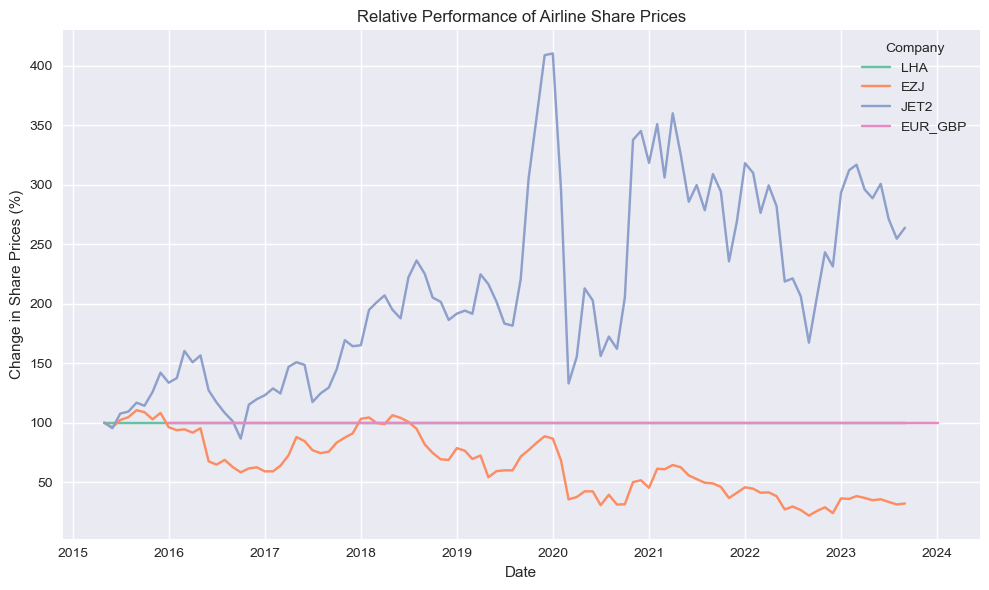

In [6]:
# Assuming restructured_data is already available from previous steps
# Grouping data by 'Company' and finding the first price value for each company
first_prices = restructured_data.groupby('Company')['Price'].first()

# Calculating relative performance as a proportion of the value at the start of the time period
Relative_Performance_df = restructured_data.merge(first_prices, on='Company', suffixes=('', '_start'))
Relative_Performance_df['Relative_Performance'] = (Relative_Performance_df['Price'] / Relative_Performance_df['Price_start']) * 100

# Plot the graph with a different palette
plt.figure(figsize=(10, 6))
sns.lineplot(data=Relative_Performance_df, x='Date', y='Relative_Performance', hue='Company', palette='Set2')  # Example: using 'Set2' palette

plt.style.use('seaborn-v0_8')
plt.title('Relative Performance of Airline Share Prices')
plt.xlabel('Date')
plt.ylabel('Change in Share Prices (%)')
plt.grid(True)
plt.legend(title='Company')

plt.tight_layout()
plt.show()
